In [578]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import datetime as dt

In [579]:
bank = pd.read_csv(r"C:\Users\youssef\Desktop\intership_1\bank+marketing\bank\bank-full.csv",sep=';')
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [580]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [581]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [582]:
bank.duplicated().sum()

0

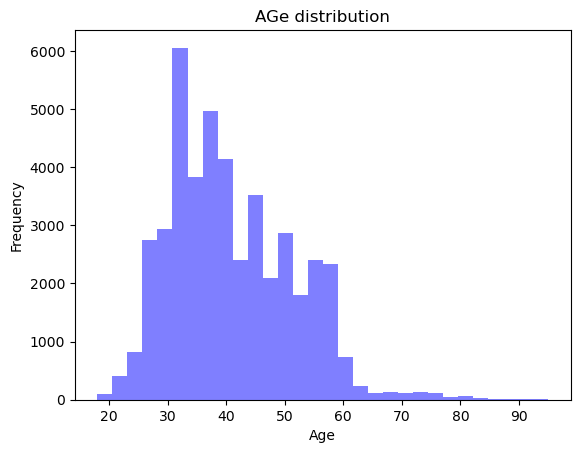

In [583]:
# Create a histogram
plt.hist(bank.age, bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('AGe distribution')
plt.show()


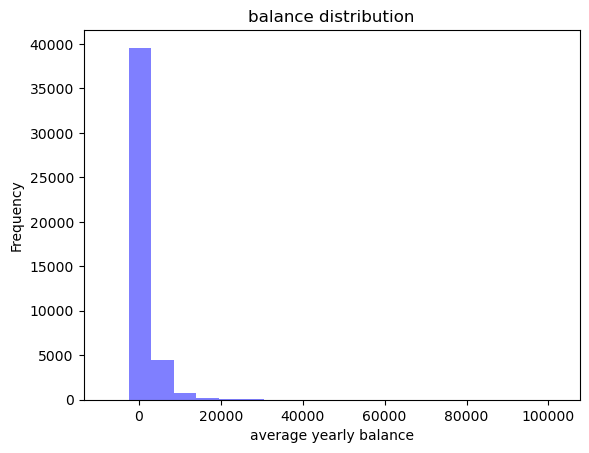

In [584]:
# Create a histogram
plt.hist(bank.balance, bins=20, color='blue', alpha=0.5)
plt.xlabel('average yearly balance')
plt.ylabel('Frequency')
plt.title('balance distribution')
plt.show()


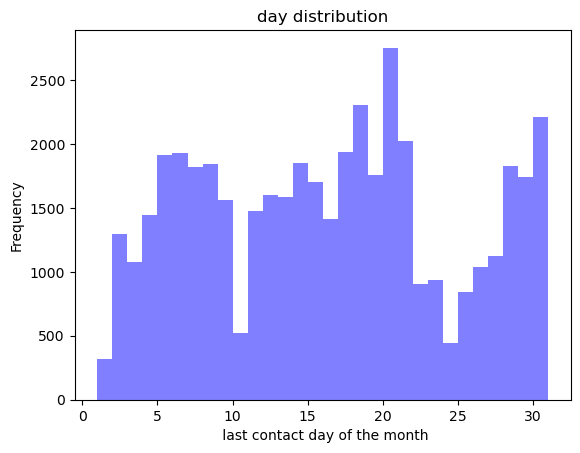

In [585]:
# Create a histogram
plt.hist(bank.day, bins=30, color='blue', alpha=0.5)
plt.xlabel(' last contact day of the month')
plt.ylabel('Frequency')
plt.title('day distribution')
plt.show()


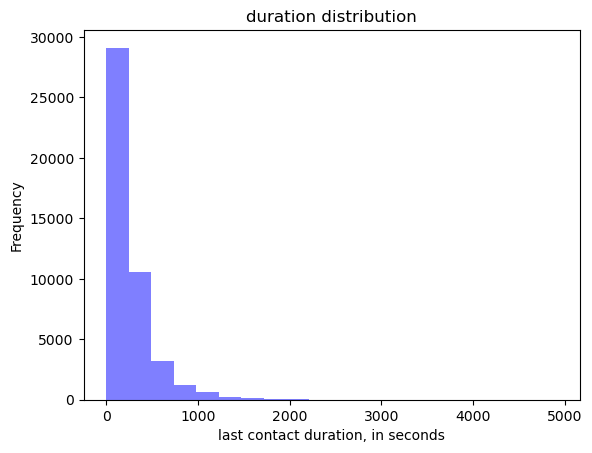

In [586]:
# Create a histogram
plt.hist(bank.duration, bins=20, color='blue', alpha=0.5)
plt.xlabel('last contact duration, in seconds')
plt.ylabel('Frequency')
plt.title('duration distribution')
plt.show()


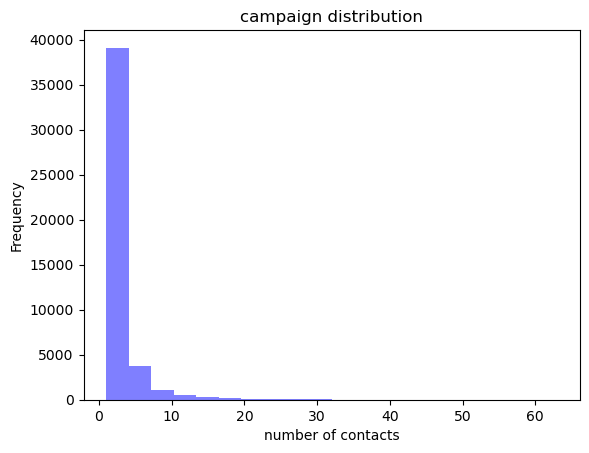

In [587]:
# Create a histogram
plt.hist(bank.campaign, bins=20, color='blue', alpha=0.5)
plt.xlabel('number of contacts')
plt.ylabel('Frequency')
plt.title('campaign distribution')
plt.show()


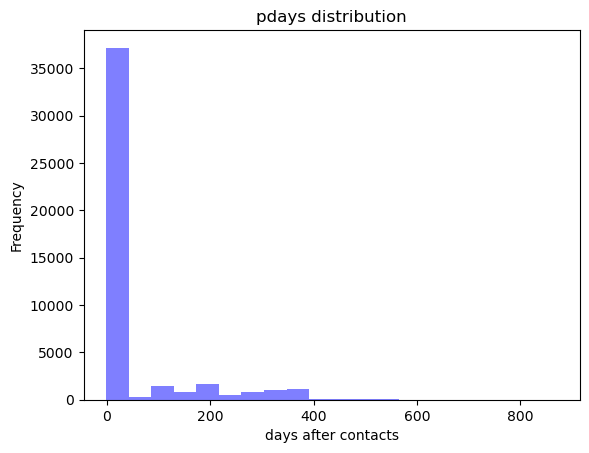

In [588]:
# Create a histogram
plt.hist(bank.pdays, bins=20, color='blue', alpha=0.5)
plt.xlabel('days after contacts')
plt.ylabel('Frequency')
plt.title('pdays distribution')
plt.show()


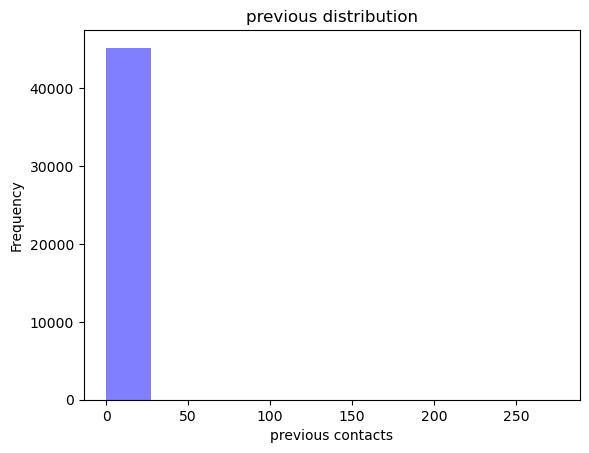

In [589]:
# Create a histogram
plt.hist(bank.previous, bins=10, color='blue', alpha=0.5)
plt.xlabel('previous contacts')
plt.ylabel('Frequency')
plt.title('previous distribution')
plt.show()


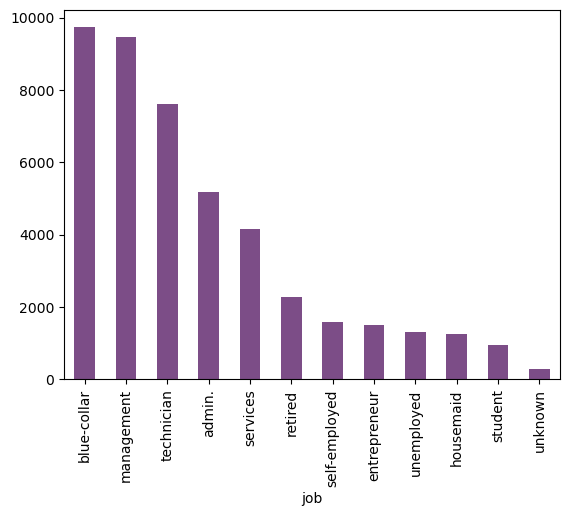

In [590]:
ax = bank['job'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

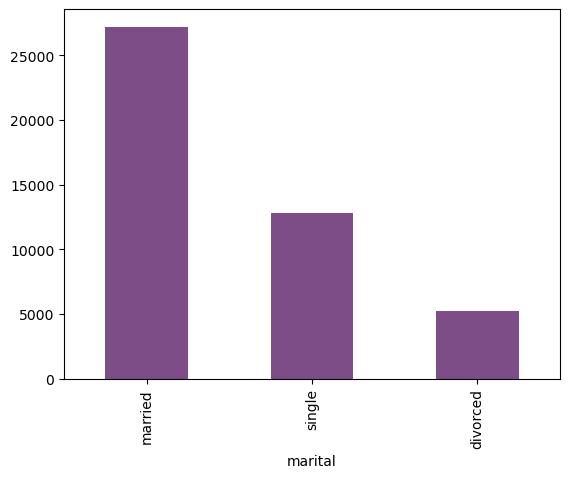

In [591]:
ax = bank['marital'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

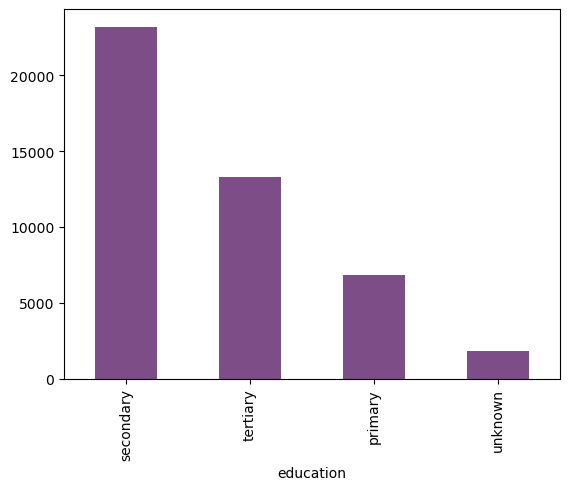

In [592]:
ax = bank['education'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

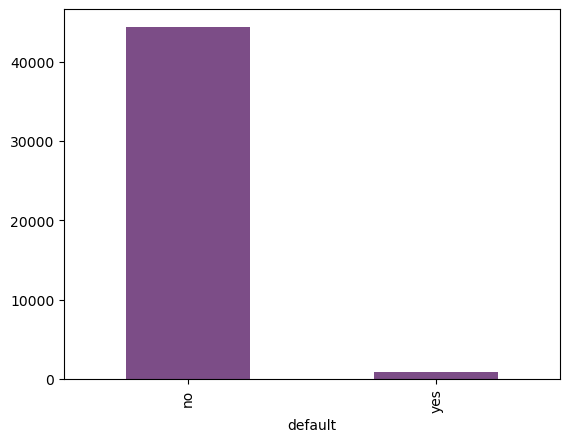

In [593]:
ax = bank['default'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

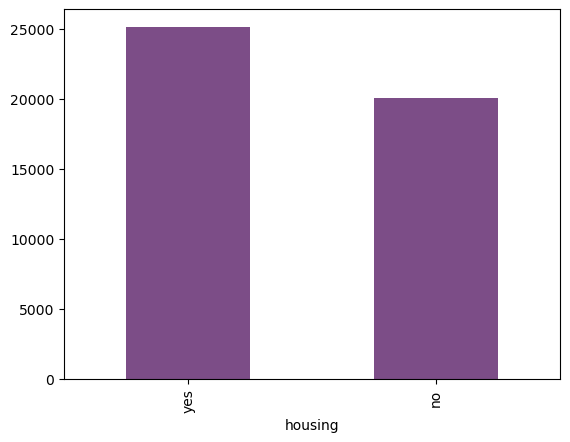

In [594]:
ax = bank['housing'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

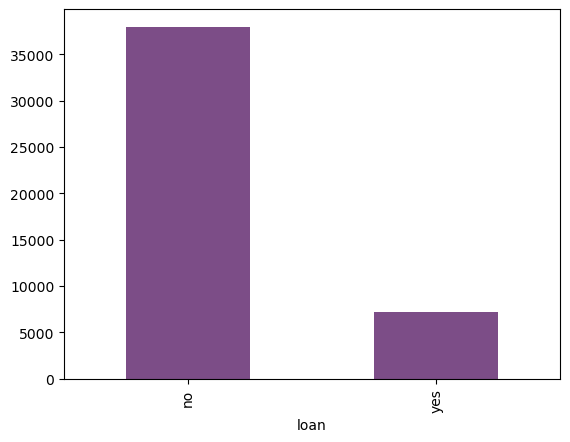

In [595]:
ax = bank['loan'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

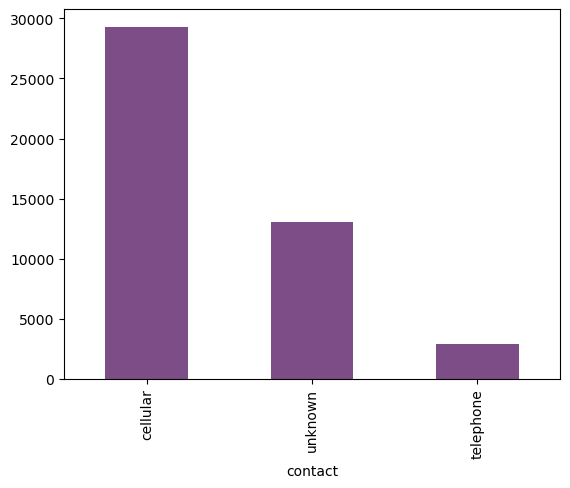

In [596]:
ax = bank['contact'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

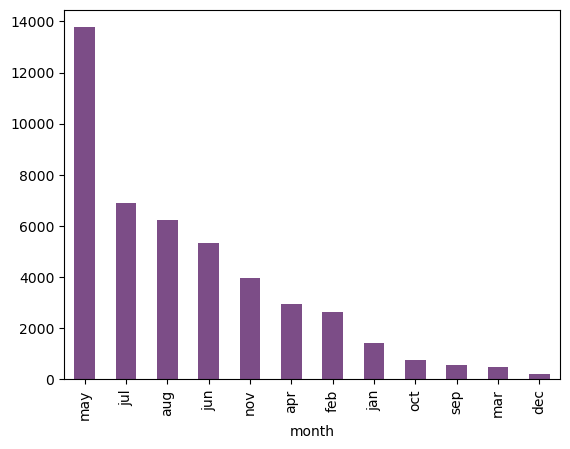

In [597]:
ax = bank['month'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

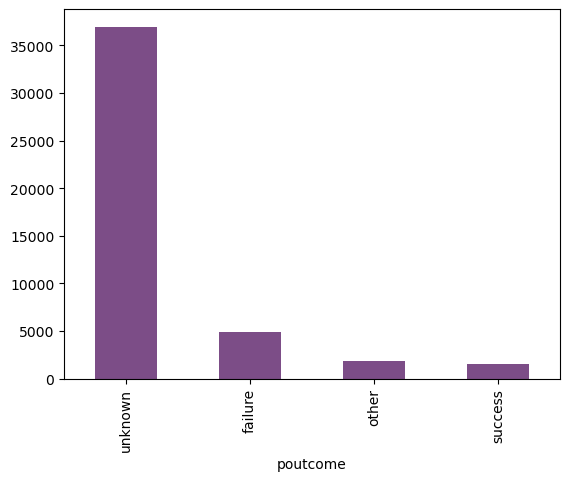

In [598]:
ax = bank['poutcome'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

In [599]:
#drop th useless columns :
bank.drop(columns=['poutcome','previous','pdays','default'],inplace=True)
bank.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign   y  
0   may       261         1  no  
1   may       151         1  no  
2   may        76         1  no  
3   may        92         1  no  
4   may       198         1  no

In [600]:
bank = pd.get_dummies(bank, columns=['housing','loan','job','marital','contact','month','education'])

In [601]:
targe=bank['y']
targe.replace({'yes':1,'no':0},inplace=True)
bank.drop('y',axis=1,inplace=True)


In [602]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   housing_no           45211 non-null  bool 
 6   housing_yes          45211 non-null  bool 
 7   loan_no              45211 non-null  bool 
 8   loan_yes             45211 non-null  bool 
 9   job_admin.           45211 non-null  bool 
 10  job_blue-collar      45211 non-null  bool 
 11  job_entrepreneur     45211 non-null  bool 
 12  job_housemaid        45211 non-null  bool 
 13  job_management       45211 non-null  bool 
 14  job_retired          45211 non-null  bool 
 15  job_self-employed    45211 non-null  bool 
 16  job_services         4

In [603]:
# Assuming you have a dataset with features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(bank, targe, test_size=0.3, random_state=42)


In [604]:
# Create the Decision Tree Classifier
dt_classifier =DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
# Train the classifier
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)




In [605]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [606]:
# Additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.55      0.22      0.32      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564
